# Exercise 4 Answer

## André Filipe Silva - 26005

In [5]:
library(readxl)
data4=read_xlsx("C:\\Users\\Casa\\OneDrive\\Documentos\\Economia Nova SBE\\1st year\\2º Semestre\\Macroeconometrics\\Midterm 2020\\data_midterm_2020.xlsx")

### Exercise 4a)

In [3]:
data4a= data4[,-1]
data4a= ts(data4a, start=1995, deltat=1/4)
data4a=(log(data4a))*100
data4a=diff(data4a)
data4a=data4a[,c(3,5,2,4,1)]

### Exercise 4b)

In [6]:
library(vars)
library(tseries)
var1= VAR(data4a[,1:5], lag.max=12, ic="SC")
var1$varresult

$G

Call:
lm(formula = y ~ -1 + ., data = datamat)

Coefficients:
      G.l1      TAX.l1        C.l1        I.l1      GDP.l1       const  
 0.7124941  -0.0472943  -0.0043900  -0.0005135   0.1532462   0.0414858  


$TAX

Call:
lm(formula = y ~ -1 + ., data = datamat)

Coefficients:
   G.l1   TAX.l1     C.l1     I.l1   GDP.l1    const  
 0.5423  -0.4282   0.4370   0.1319   0.8086  -0.1257  


$C

Call:
lm(formula = y ~ -1 + ., data = datamat)

Coefficients:
    G.l1    TAX.l1      C.l1      I.l1    GDP.l1     const  
 0.33309  -0.05332  -0.22690   0.06211   0.50339   0.16320  


$I

Call:
lm(formula = y ~ -1 + ., data = datamat)

Coefficients:
   G.l1   TAX.l1     C.l1     I.l1   GDP.l1    const  
 0.1092  -0.2770   0.3371  -0.3155   2.6463  -0.7990  


$GDP

Call:
lm(formula = y ~ -1 + ., data = datamat)

Coefficients:
    G.l1    TAX.l1      C.l1      I.l1    GDP.l1     const  
 0.22873  -0.06981  -0.02813   0.04883   0.38078   0.16897  



In [8]:
adf.test(residuals(var1)[,1])

Warning message in adf.test(residuals(var1)[, 1]):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  residuals(var1)[, 1]
Dickey-Fuller = -4.5667, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


We reject the null hypothesis, so the residuals for G are stationary at a 5% significance level.

In [9]:
adf.test(residuals(var1)[,2])

Warning message in adf.test(residuals(var1)[, 2]):
"p-value smaller than printed p-value"


	Augmented Dickey-Fuller Test

data:  residuals(var1)[, 2]
Dickey-Fuller = -4.2466, Lag order = 4, p-value = 0.01
alternative hypothesis: stationary


The residuals for TAX are also stationary at a 5% significance level.

In [10]:
adf.test(residuals(var1)[,3])


	Augmented Dickey-Fuller Test

data:  residuals(var1)[, 3]
Dickey-Fuller = -3.523, Lag order = 4, p-value = 0.04377
alternative hypothesis: stationary


Residuals for C are also stationary at a 5% significance level - but they wouldn't be at a 1% significance level.

In [11]:
adf.test(residuals(var1)[,4])


	Augmented Dickey-Fuller Test

data:  residuals(var1)[, 4]
Dickey-Fuller = -3.7437, Lag order = 4, p-value = 0.02454
alternative hypothesis: stationary


Again, residuals for I are stationary at a 5% significance level, but wouldn't be at a 1% significance level.

In [13]:
adf.test(residuals(var1)[,5])


	Augmented Dickey-Fuller Test

data:  residuals(var1)[, 5]
Dickey-Fuller = -3.7606, Lag order = 4, p-value = 0.02373
alternative hypothesis: stationary


Residuals for GDP are also stationary at a 5% significance level - but wouldn't be at a 1% level.

All of our residuals series are stationary. This means our VAR model is adequate for understanding dynamics among the variables. This is all that is necessary for IRFs (which is what comes next in the questions). 

However, if we were concerned with hypothesis testing, we would need stationarity not only on the residuals, but on the full model.

### Exercise 4c)

Note: Even if we did not have stationarity, IRFs would still be viable.

20 steps ahead means 5 years ahead since we have quarterly data.

In [13]:
irf1=irf(var1, n.ahead=20, ci=0.95, runs=100)
irf1$irf$G


G,TAX,C,I,GDP
0.4873708532,0.455660968,0.1349622926,0.808932727,0.1380277720
0.3458430714,0.346469222,0.2271459131,0.082524015,0.1679256933
0.2547195863,0.285148518,0.1348416898,0.436713201,0.1164989194
0.1850371277,0.226762352,0.1248145598,0.164784067,0.1002460653
0.1358430867,0.160591681,0.0819206928,0.212758047,0.0691991816
0.0993279645,0.124719837,0.0661465374,0.113958574,0.0542937263
0.0728434655,0.088302564,0.0458356355,0.106319242,0.0383897852
0.0533516121,0.066788458,0.0350838283,0.066991315,0.0290168426
0.0391123025,0.047965865,0.0250170051,0.054802886,0.0208735554
0.0286596028,0.035711545,0.0187055077,0.037364261,0.0155179136


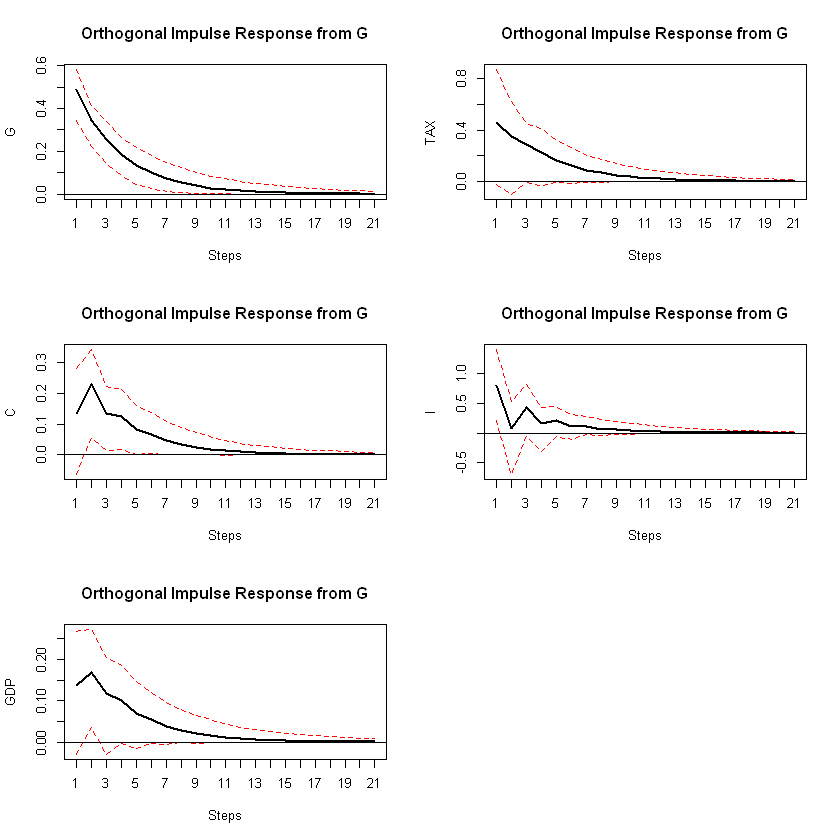

In [14]:
par(mfrow=c(3,2))
stepSize = 1
xMax = 25
numTicks = xMax / stepSize
v1 = c(0:numTicks)*stepSize
plot(irf1$irf$G[,1], type ='l',lwd=2, main="Orthogonal Impulse Response from G", ylab="G", xlab="Steps", xaxt="n", ylim=range(irf1$Lower$G[,1],irf1$Upper$G[,1]))
lines(irf1$Upper$G[,1], lty=2, col="red")
lines(irf1$Lower$G[,1], lty=2, col="red")
axis(side=1, at=v1, labels=v1)
abline(h=0)
plot(irf1$irf$G[,2], type ='l',lwd=2, main="Orthogonal Impulse Response from G", ylab= "TAX", xlab="Steps",xaxt="n", ylim=range(irf1$Lower$G[,2],irf1$Upper$G[,2]))
lines(irf1$Upper$G[,2], lty=2, col="red")
lines(irf1$Lower$G[,2], lty=2, col="red")
axis(side=1, at=v1, labels=v1)
abline(h=0)
plot(irf1$irf$G[,3], type ='l',lwd=2, main="Orthogonal Impulse Response from G", ylab= "C", xlab="Steps",xaxt="n", ylim=range(irf1$Lower$G[,3],irf1$Upper$G[,3]))
lines(irf1$Upper$G[,3], lty=2, col="red")
lines(irf1$Lower$G[,3], lty=2, col="red")
axis(side=1, at=v1, labels=v1)
abline(h=0)

plot(irf1$irf$G[,4], type ='l',lwd=2, main="Orthogonal Impulse Response from G", ylab= "I", xlab="Steps",xaxt="n", ylim=range(irf1$Lower$G[,4],irf1$Upper$G[,4]))
lines(irf1$Upper$G[,4], lty=2, col="red")
lines(irf1$Lower$G[,4], lty=2, col="red")
axis(side=1, at=v1, labels=v1)
abline(h=0)
plot(irf1$irf$G[,5], type ='l',lwd=2, main="Orthogonal Impulse Response from G", ylab= "GDP", xlab="Steps",xaxt="n", ylim=range(irf1$Lower$G[,5],irf1$Upper$G[,5]))
lines(irf1$Upper$G[,5], lty=2, col="red")
lines(irf1$Lower$G[,5], lty=2, col="red")
axis(side=1, at=v1, labels=v1)
abline(h=0)

From the "Orthogonal Impulse Response from G", and from the VAR, we can see that a positive shock to government spending (G) today will lead to an increase at t+1 in consumption (C), and GDP. Taxation (TAX) is not discernibly affected by a shock from government expenditure. Investment (I) is impacted in an oscillatory manner, first going down and then up again over some periods.

### Exercise 4d)

In [16]:
fevdg=fevd(var1, n.ahead=20)
fevdg$GDP

G,TAX,C,I,GDP
0.04034955,0.4640846,0.10820140,0.04338808,0.3439764
0.07986986,0.3843743,0.10289238,0.11852299,0.3143404
0.09834162,0.3721936,0.10038479,0.11344936,0.3156306
0.11214399,0.3645009,0.09854789,0.11441515,0.3103921
0.11866067,0.3613406,0.09786928,0.11340282,0.3087266
0.12265433,0.3595013,0.09738901,0.11307543,0.3073799
0.12464178,0.3586047,0.09717502,0.11279749,0.3067810
0.12577519,0.3581008,0.09704340,0.11267059,0.3064100
0.12636069,0.3578413,0.09697886,0.11259228,0.3062269
0.12668411,0.3576985,0.09694186,0.11255317,0.3061224


G shocks explain about 4.03% of the variation in GDP at impact and this value keeps increasing on the 20 steps ahead until it reaches 12.71%. That is its relevant importance, along the 20 steps, in explaining variation in GDP.

### Exercise 4e)

In [17]:
library(forecast)
data4e=data4[1:99,]
data4e=data4e[,-1]
data4ets= ts(data4e, start=1995, deltat=1/4)
data4ets=(log(data4ets))*100
data4ets=diff(data4ets)
data4ets=data4ets[,c(3,5,2,4,1)]
var2= VAR(data4ets[,1:5], lag.max=12, ic="SC")
varforecast=predict(var2, n.ahead=1, ci=0.95)
arimaforecast=auto.arima(data4e$GDP)

Warning message:
"package 'forecast' was built under R version 3.6.2"

In [18]:
data4$GDP[100]
(varforecast$fcst$GDP)*100
forecast(arimaforecast, h=1)

[1] 107

,fcst,lower,upper,CI
GDP.fcst,28.94059,-106.2762,164.1574,135.2168


    Point Forecast    Lo 80    Hi 80    Lo 95    Hi 95
100       106.8378 105.9847 107.6908 105.5332 108.1424

So we can see clearly that:

True value: 107

VAR Forecast: 28,94059

ARIMA Forecast: 106,8378

The forecasts for the VAR have such huge variation and are so far off the mark that I'm actually not sure I did everything right. However, if I did not make any mistakes, this shows that the ARIMA model is so much better because the prediction is much much closer to the observed value than the VAR one, and the standard error is much lower. As we have learned in classes, VAR models are usually overparametrized and lose a lot of degrees of freedom - and parsimonious ARIMA models are usually the way to go for forecasts.